In [1]:
import pandas as pd

In [5]:
data=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")

In [6]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
data["Qual_miles"].value_counts()

Qual_miles
0       3773
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: count, Length: 164, dtype: int64

In [8]:
data["cc1_miles"].value_counts()

cc1_miles
1    2289
3     613
4     525
5     288
2     284
Name: count, dtype: int64

In [9]:
data["cc2_miles"].value_counts()

cc2_miles
1    3956
2      28
3      15
Name: count, dtype: int64

In [10]:
data["cc3_miles"].value_counts()

cc3_miles
1    3981
4       6
5       5
3       4
2       3
Name: count, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [13]:
data.drop(columns="ID#",inplace=True)

In [14]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [21]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    print(x)
    return x

In [23]:
df_norm = norm_func(data.iloc[:,:])

       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.

In [24]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

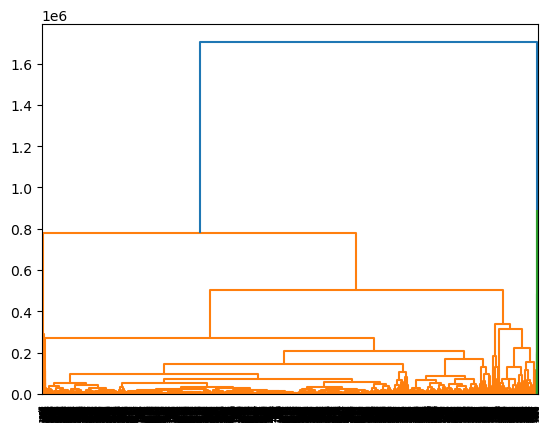

In [25]:
dend=sch.dendrogram(sch.linkage(data,method="complete"))

In [31]:
hc = AgglomerativeClustering(n_clusters=4, metric = 'euclidean', linkage = 'complete', distance_threshold=None)

In [32]:
y_hc = hc.fit_predict(df_norm)

In [33]:
data['h_clusterid'] = y_hc

In [34]:
data.groupby("h_clusterid").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,
0,59791.056611,88.188836,1.703484,1.018606,1.011085,10324.882423,9.192003,230.441013,0.672209,3824.887965,0.003167
1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
